Check Python version

In [1]:
!python --version

Python 3.10.14


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from darts import TimeSeries
from darts.datasets import ILINetDataset
from darts.utils.missing_values import missing_values_ratio, fill_missing_values

### **Extract Data**

In [4]:
# Through online Darts
series = ILINetDataset().load()
dataset = series.pd_dataframe().reset_index()
dataset.index.name = None

In [5]:
dataset.shape

(1305, 12)

In [6]:
dataset.columns

Index(['DATE', '% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS'],
      dtype='object', name='component')

In [7]:
dataset.head()

component,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,1997-10-12,1.10148,1.21686,179.0,NaN,157.0,205.0,NaN,29.0,570.0,192.0,46842.0
1,1997-10-19,1.20007,1.28064,199.0,NaN,151.0,242.0,NaN,23.0,615.0,191.0,48023.0
2,1997-10-26,1.37876,1.23906,228.0,NaN,153.0,266.0,NaN,34.0,681.0,219.0,54961.0
3,1997-11-02,1.19920,1.14473,188.0,NaN,193.0,236.0,NaN,36.0,653.0,213.0,57044.0
4,1997-11-09,1.65618,1.26112,217.0,NaN,162.0,280.0,NaN,41.0,700.0,213.0,55506.0


In [8]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

In [ ]:
dataset.tail()

component,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1300,2022-09-11,2.02422,1.94821,12548.0,6978.0,NaN,13475.0,2701.0,2632.0,38334.0,3324.0,1967653.0
1301,2022-09-18,2.03228,1.97359,13386.0,6709.0,NaN,14467.0,2599.0,2435.0,39596.0,3316.0,2006289.0
1302,2022-09-25,2.28328,2.20031,15904.0,6877.0,NaN,16571.0,2633.0,2473.0,44458.0,3329.0,2020531.0
1303,2022-10-02,2.36912,2.30242,16977.0,6869.0,NaN,16622.0,2764.0,2633.0,45865.0,3335.0,1992031.0
1304,2022-10-09,2.56561,2.56080,17521.0,10009.0,NaN,18196.0,3716.0,3458.0,52900.0,3356.0,2065759.0


In [10]:
col_list = ['% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS']

In [11]:

series = TimeSeries.from_dataframe(dataset, 'DATE', col_list)
series_filled = fill_missing_values(series)
df_filled = series_filled.pd_dataframe().reset_index()

Define the required time and target columns

In [12]:
time_col = dataset.columns[0]
target_col = dataset.columns[-1]
dataset[time_col] = dataset[time_col].astype(str)

Change target column to float

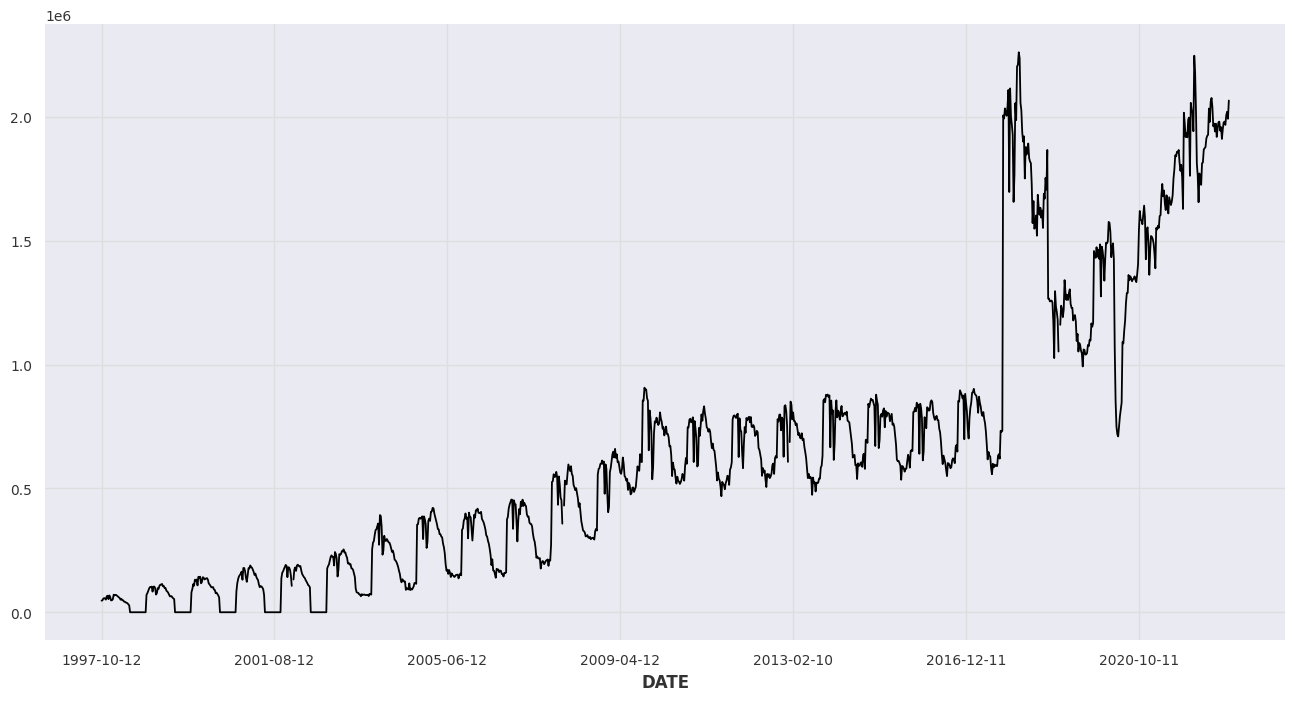

In [13]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);

<Axes: xlabel='DATE'>

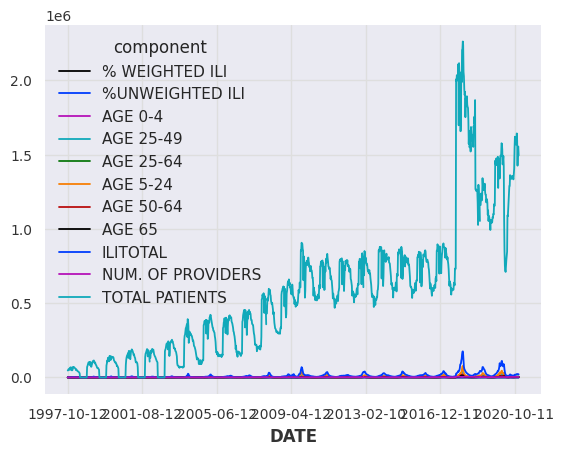

In [14]:
dataset[dataset.DATE < '2021'].set_index(time_col).plot()

<Axes: xlabel='DATE'>

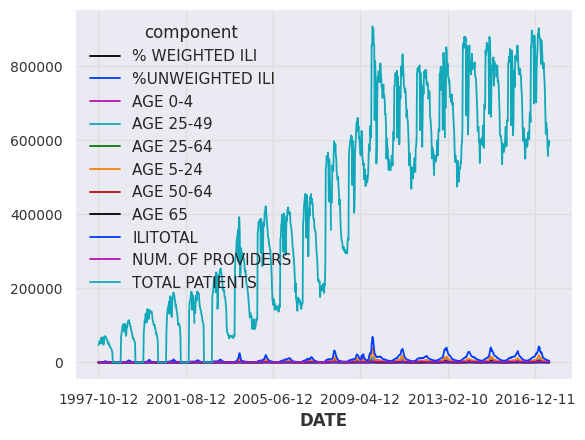

In [15]:
dataset[dataset.DATE < '2017-08'].set_index(time_col).plot()

In [16]:
# trim the anomaly part
dataset_partial = df_filled[df_filled.DATE < '2017-08']

In [17]:
dataset_partial

component,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,1997-10-12,1.101480,1.216860,179.0,0.0,157.0,205.0,0.0,29.0,570.0,192.0,46842.0
1,1997-10-19,1.200070,1.280640,199.0,0.0,151.0,242.0,0.0,23.0,615.0,191.0,48023.0
2,1997-10-26,1.378760,1.239060,228.0,0.0,153.0,266.0,0.0,34.0,681.0,219.0,54961.0
3,1997-11-02,1.199200,1.144730,188.0,0.0,193.0,236.0,0.0,36.0,653.0,213.0,57044.0
4,1997-11-09,1.656180,1.261120,217.0,0.0,162.0,280.0,0.0,41.0,700.0,213.0,55506.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2017-07-02,0.859531,0.961603,1771.0,1121.0,6090.0,1748.0,489.0,467.0,5596.0,1422.0,581945.0
1030,2017-07-09,0.818998,0.955818,1728.0,1111.0,6090.0,1564.0,505.0,418.0,5326.0,1456.0,557219.0
1031,2017-07-16,0.752505,0.827597,1545.0,1004.0,6090.0,1578.0,462.0,372.0,4961.0,1405.0,599446.0
1032,2017-07-23,0.731146,0.811886,1549.0,908.0,6090.0,1421.0,450.0,419.0,4747.0,1384.0,584688.0


In [18]:
dataset_partial['DATE'] = dataset_partial['DATE'].astype('str')

/tmp/ipykernel_131338/1473158665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_partial['DATE'] = dataset_partial['DATE'].astype('str')


In [19]:
# dataset[target_col] = dataset[target_col].astype(float)

In [20]:
# dataset.head()

Split dataset into train and test sets

In [21]:
train_size = 0.8
train_points = int(train_size*len(dataset_partial))
train_df = dataset_partial.iloc[:train_points]
test_df = dataset_partial.iloc[train_points:]

Plot graph

In [22]:
train_df['DATE'] = train_df['DATE'].astype('str')

/tmp/ipykernel_131338/1870464413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['DATE'] = train_df['DATE'].astype('str')


### **Train API**

Train data: convert df to list-of-list

In [23]:
train_data = []
for value in train_df.values:
    train_data.append(list(value))

In [24]:
train_data[:2]

[['1997-10-12',
  1.10148,
  1.21686,
  179.0,
  0.0,
  157.0,
  205.0,
  0.0,
  29.0,
  570.0,
  192.0,
  46842.0],
 ['1997-10-19',
  1.20007,
  1.28064,
  199.0,
  0.0,
  151.0,
  242.0,
  0.0,
  23.0,
  615.0,
  191.0,
  48023.0]]

Custom Model Request (optional)

In [25]:
# Default model request

# # Customized model request
model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            # {'type': 'dartsimputer'},
            # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            {'type': 'darts_nlinear',
             'params': {
                 'output_chunk_length': 52,
                 'input_chunk_length': 52,                 
                 'n_epochs': 20,
            }},
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            # {'type': 'darts_nlinear'},
            # {'type': 'darts_dlinear'},
            # {'type': 'darts_blockrnn'},
        ],
    },
}

This is for JSON model_request

In [26]:
# file_path = 'model_request.json'
# # For writing the model request to a json file
# with open(file_path, 'r') as file:
#     model_request = json.load(file)

This is for YAML model_request

In [27]:
# file_path = 'model_request.yaml'
# # For reading the model request from a yaml file
# with open(file_path, 'r') as file:
#     model_request = yaml.safe_load(file)

Train API JSON Payload

In [28]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [29]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [30]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [31]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [32]:
%%time
response = requests.post(url, json=api_json, verify=False)
print(response)
print()

/home/kevin/.conda/envs/dsybil/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dsybil-test.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Response [200]>

CPU times: user 45 ms, sys: 4.37 ms, total: 49.3 ms
Wall time: 31.4 s


In [33]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEDCEaXAgBAlwIAVpcCAIAElQhGAQAAAAAAjA9tb2RlbHMucGlwZWxpbmWUjAhQaXBlbGluZZSTlCmBlH2UKIwMdHJhbnNmb3JtZXJzlF2UjBNtb2RlbHMucHJlcHJvY2Vzc29ylIwMTWluTWF4U2NhbGVylJOUKYGUfZQojANtaW6USwCMA21heJRLAYwEbWluX5SMFW51bXB5LmNvcmUubXVsdGlhcnJheZSMBnNjYWxhcpSTlIwFbnVtcHmUjAVkdHlwZZSTlIwCZjiUiYiHlFKUKEsDjAE8lE5OTkr/////Sv////9LAHSUYkMIAAAAAAAAAACUhpRSlIwEbWF4X5RoEWgXQwgAAAAAUKorQZSGlFKUdWJhjAVtb2RlbJSMFG1vZGVscy5tb2RlbHdyYXBwZXJzlIwLTWV0YU1vZGVsV0GUk5QpgZR9lCiMC2Jhc2VfbW9kZWxzlF2UaCKMDERhcnRzV3JhcHBlcpSTlCmBlH2UKGghjCBkYXJ0cy5tb2RlbHMuZm9yZWNhc3RpbmcubmxpbmVhcpSMDE5MaW5lYXJNb2RlbJSTlCmBlH2UKIwQX3JhbmRvbV9pbnN0YW5jZZSMFG51bXB5LnJhbmRvbS5fcGlja2xllIwSX19yYW5kb21zdGF0ZV9jdG9ylJOUjAdNVDE5OTM3lGgzjBRfX2JpdF9nZW5lcmF0b3JfY3RvcpSTlIaUUpR9lCiMDWJpdF9nZW5lcmF0b3KUjAdNVDE5OTM3lIwFc3RhdGWUfZQojANrZXmUaA+MDF9yZWNvbnN0cnVjdJSTlGgSjAduZGFycmF5lJOUSwCFlEMBYpSHlFKUKEsBTXAChZRoFIwCdTSUiYiHlFKUKEsDaBhOTk5K/////0r/////SwB0lGKJQsAJAAAAyXIAj9jXzFbzvRQlBJcR1hZuEIchsU3nWQhIM5Ou5Lv3tsFCYq9BXJ+mxixJK1+8yP7swKt5dAsSM

### **Forecast API**

Forecast Dates: predict the next 32 years of temperature anomaly data (1980-2012)

In [34]:
test_data = []
for value in test_df.drop(columns=target_col).values:
    test_data.append(list(value))

In [35]:
test_data[:2]

[['2013-08-18',
  0.755639,
  0.779136,
  1367.0,
  870.0,
  6090.0,
  1338.0,
  302.0,
  198.0,
  4075.0,
  1299.0],
 ['2013-08-25',
  0.761847,
  0.797653,
  1364.0,
  919.0,
  6090.0,
  1366.0,
  331.0,
  188.0,
  4168.0,
  1276.0]]

Model from Train API

In [36]:
model = train_json_out['model']

Forecast API JSON Payload

In [37]:
api_json = {
    'model': model,
    'data': test_data
}

Build URL (same as train except for the endpoint)

In [38]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [39]:
%%time
response = requests.post(url, json=api_json, verify=False)
print(response)
print()

/home/kevin/.conda/envs/dsybil/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dsybil-test.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Response [200]>

CPU times: user 77.1 ms, sys: 2.41 ms, total: 79.5 ms
Wall time: 818 ms


In [40]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['2013-08-18', 550875.2005791472],
  ['2013-08-25', 592261.7527906987],
  ['2013-09-01', 598308.1867168352],
  ['2013-09-08', 603240.8216203842],
  ['2013-09-15', 599540.3766019006],
  ['2013-09-22', 634658.167139485],
  ['2013-09-29', 677662.6398362033],
  ['2013-10-06', 743998.8589168504],
  ['2013-10-13', 766076.6314457643],
  ['2013-10-20', 792709.4028226166],
  ['2013-10-27', 796627.7469057968],
  ['2013-11-03', 796502.4553712799],
  ['2013-11-10', 792120.6540009899],
  ['2013-11-17', 795107.4139235752],
  ['2013-11-24', 770510.7470766999],
  ['2013-12-01', 796081.5564796621],
  ['2013-12-08', 796954.0998204856],
  ['2013-12-15', 800870.7457916824],
  ['2013-12-22', 771017.2421721935],
  ['2013-12-29', 725556.8017797123],
  ['2014-01-05', 718798.1395849405],
  ['2014-01-12', 765521.2023221249],
  ['2014-01-19', 793690.600443655],
  ['2014-01-26', 820312.8315643049],
  ['2014-02-02', 828581.1790491118],
  ['2014-02-09', 823418.5481526306],
  ['2014-02-16', 809831.56165381

Combine forecast dates and output

In [41]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [42]:
forecast_df.shape

(207, 2)

In [43]:
forecast_df.columns

Index(['DATE', 'TOTAL PATIENTS'], dtype='object')

In [44]:
forecast_df.head()

,DATE,TOTAL PATIENTS
0,2013-08-18,550875.200579
1,2013-08-25,592261.752791
2,2013-09-01,598308.186717
3,2013-09-08,603240.821620
4,2013-09-15,599540.376602


In [45]:
forecast_df.tail()

,DATE,TOTAL PATIENTS
202,2017-07-02,664329.131844
203,2017-07-09,681830.635567
204,2017-07-16,663819.213635
205,2017-07-23,680784.812127
206,2017-07-30,675004.181988


Plot train and forecast side-by-side

/tmp/ipykernel_131338/2998340865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['color'] = 'b'


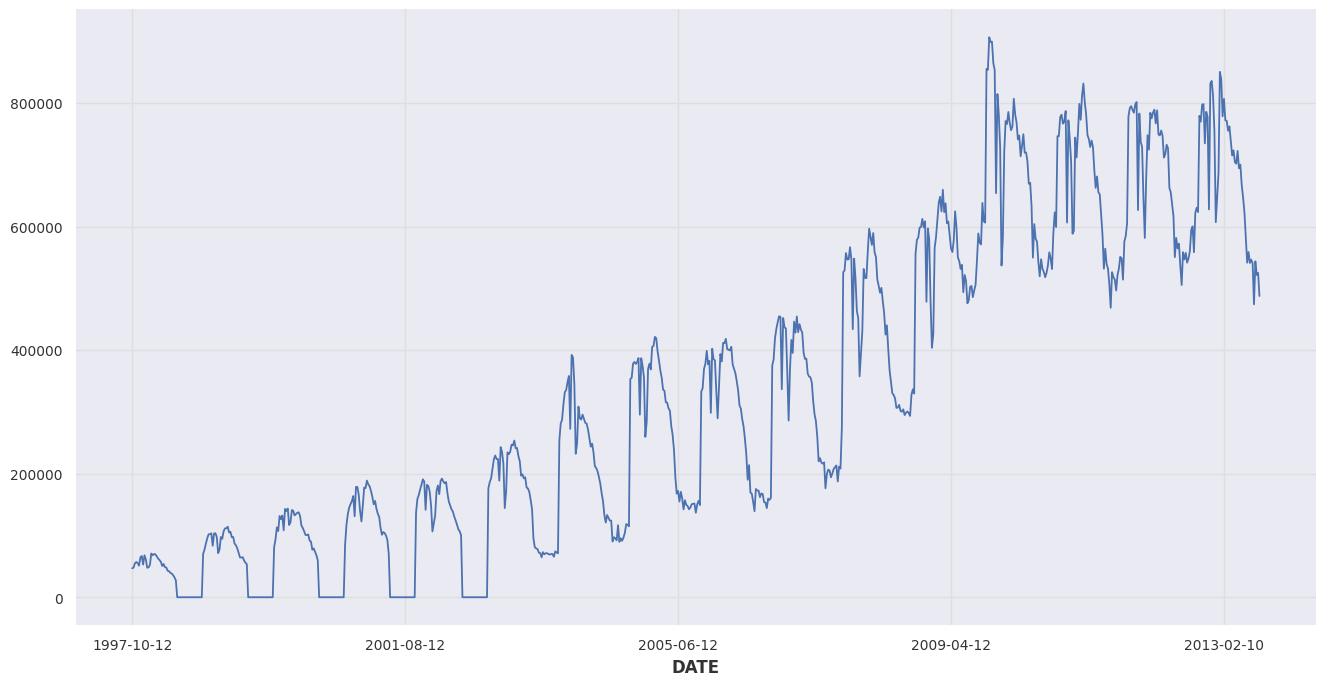

In [46]:
train_df['color'] = 'b'
train_df.set_index(time_col)[target_col].plot(figsize=figsize, color=train_df['color']);

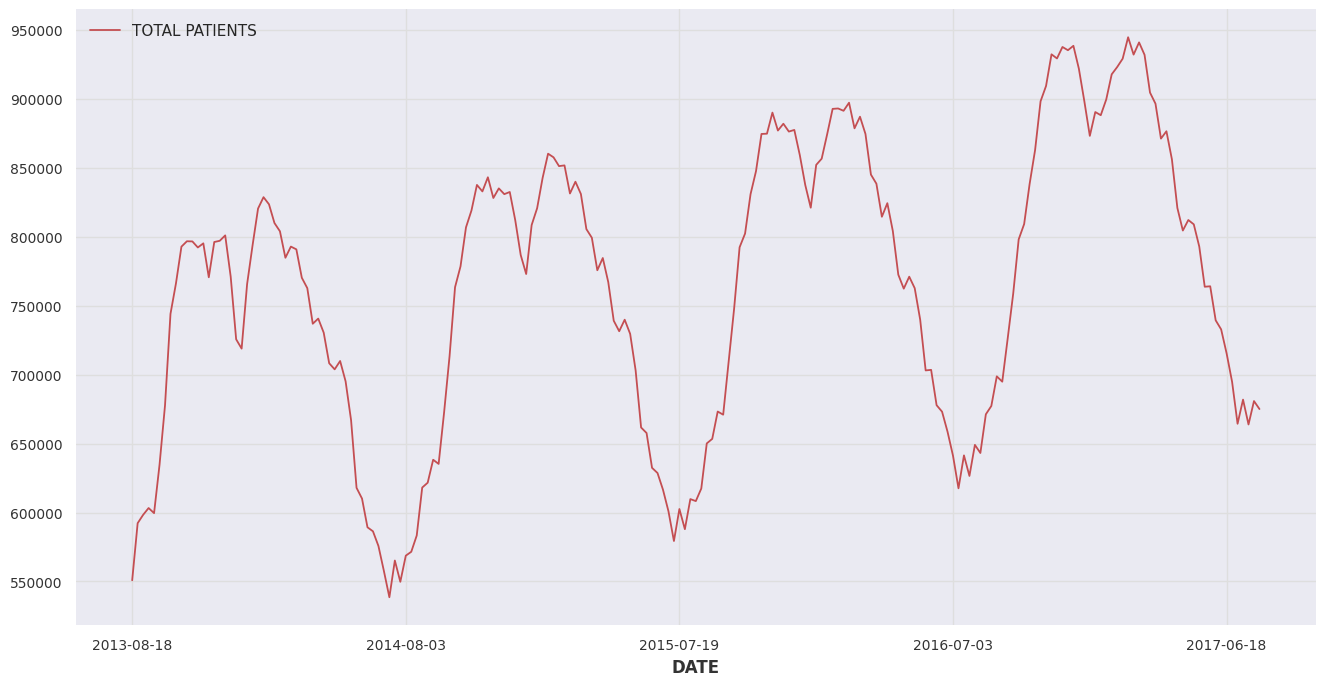

In [47]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [48]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [49]:
df.shape

(1034, 13)

In [50]:
df.head()

,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,color
0,1997-10-12,1.10148,1.21686,179.0,0.0,157.0,205.0,0.0,29.0,570.0,192.0,46842.0,b
1,1997-10-19,1.20007,1.28064,199.0,0.0,151.0,242.0,0.0,23.0,615.0,191.0,48023.0,b
2,1997-10-26,1.37876,1.23906,228.0,0.0,153.0,266.0,0.0,34.0,681.0,219.0,54961.0,b
3,1997-11-02,1.19920,1.14473,188.0,0.0,193.0,236.0,0.0,36.0,653.0,213.0,57044.0,b
4,1997-11-09,1.65618,1.26112,217.0,0.0,162.0,280.0,0.0,41.0,700.0,213.0,55506.0,b


In [51]:
df.tail()

,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,color
1029,2017-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,664329.131844,r
1030,2017-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681830.635567,r
1031,2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663819.213635,r
1032,2017-07-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680784.812127,r
1033,2017-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675004.181988,r


Plot combined train and forecast sets with the vertical black line as the cut-off

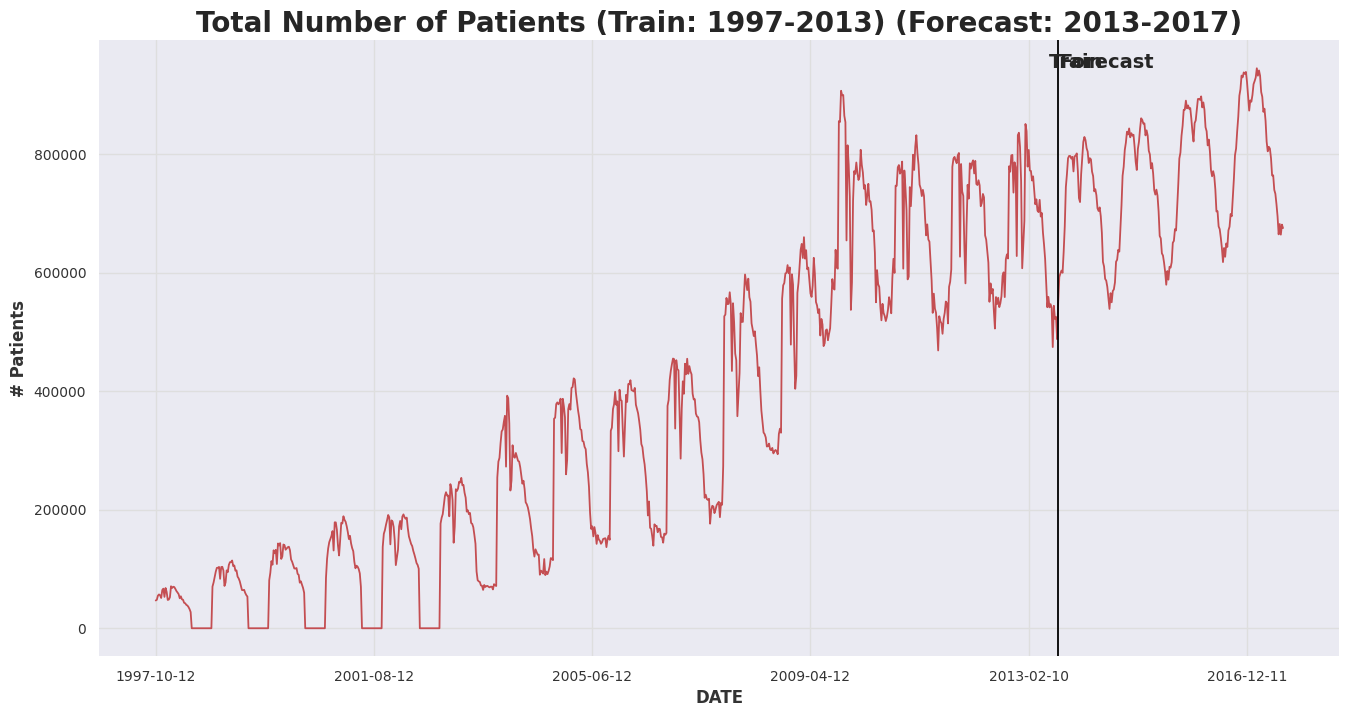

In [52]:
df.set_index(time_col)[target_col].plot(figsize=figsize, color='r')
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.ylabel(ylabel='# Patients')
plt.title(label='Total Number of Patients (Train: 1997-2013) (Forecast: 2013-2017)', fontweight='bold', fontsize=20)
plt.show();

Plot original dataset to compare

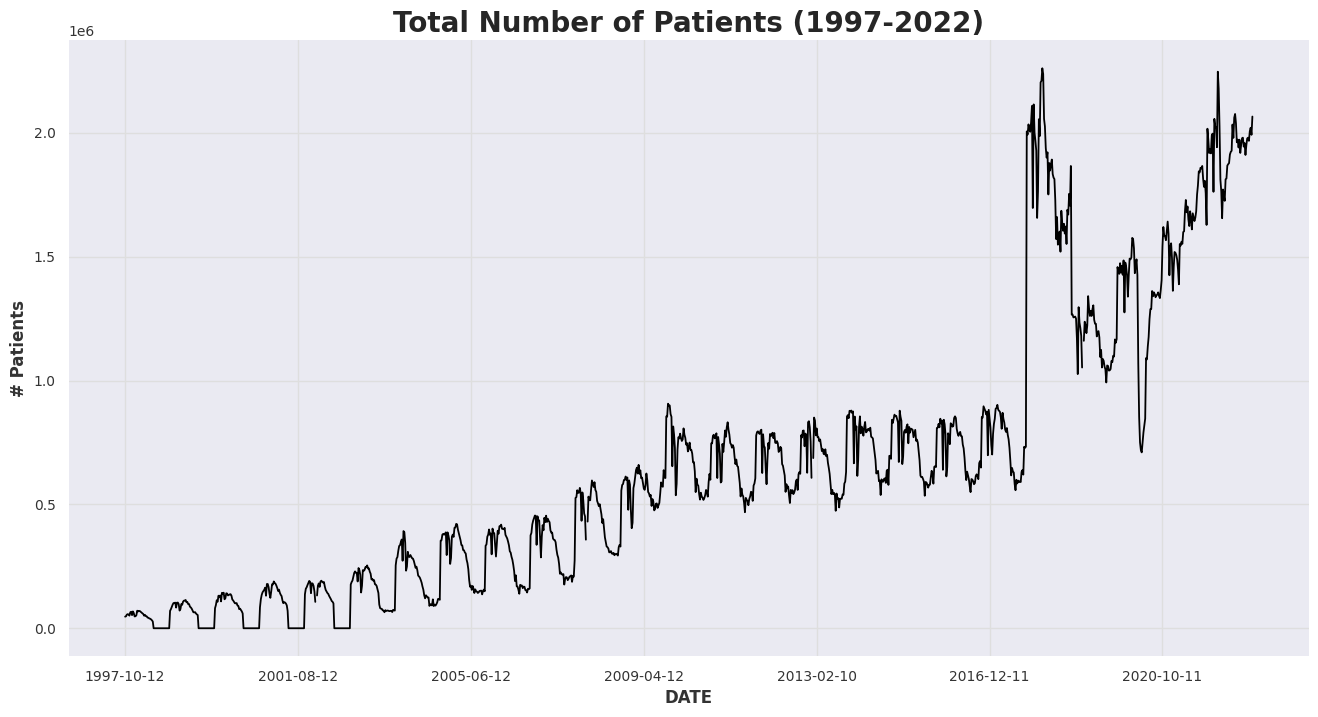

In [53]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);
plt.ylabel(ylabel='# Patients')
plt.title(label='Total Number of Patients (1997-2022)', fontweight='bold', fontsize=20)
plt.show();

Plot original dataset (blue) with SYBIL forecasted values (red)

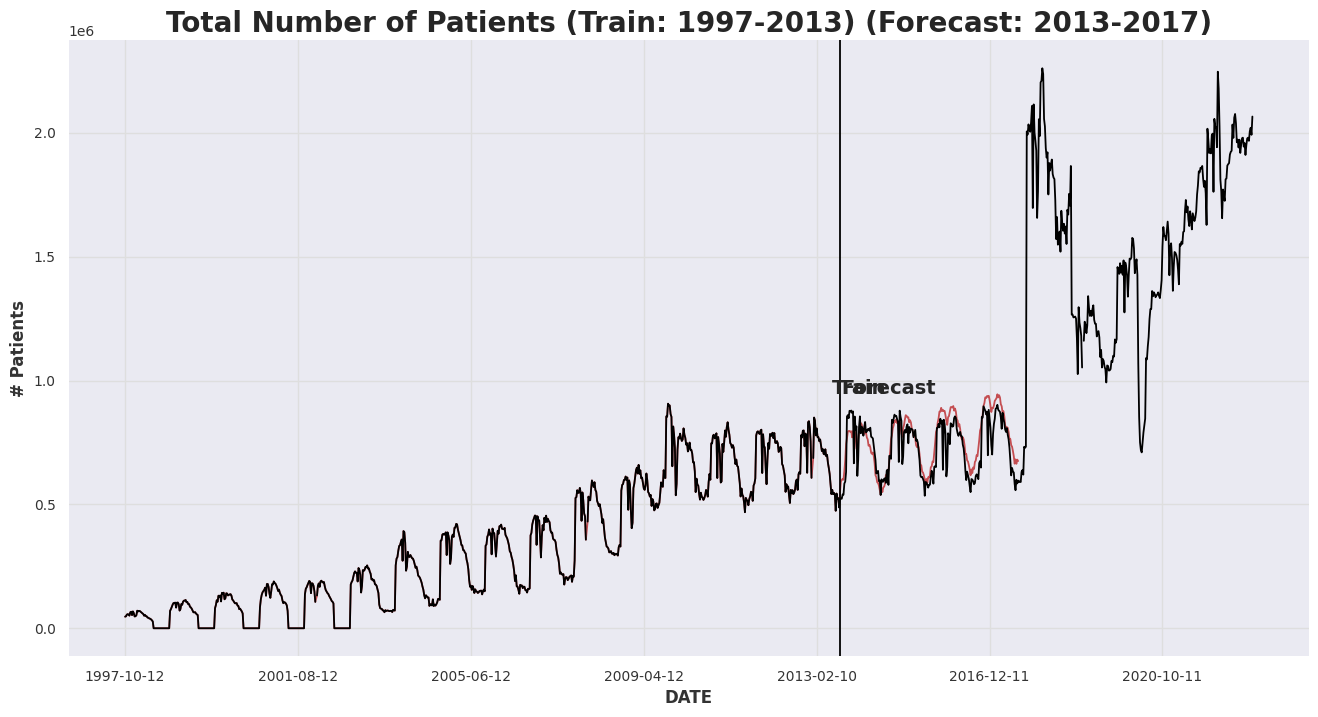

In [54]:
df.set_index(time_col)[target_col].plot(figsize=figsize, color='r')
dataset.set_index(time_col)[target_col].plot(figsize=figsize);
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.ylabel(ylabel='# Patients')
plt.title(label='Total Number of Patients (Train: 1997-2013) (Forecast: 2013-2017)', fontweight='bold', fontsize=20)
plt.show();